<a href="https://colab.research.google.com/github/v2047/Data-Analysis/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Objective:***
1)Improve customer experience by analyzing Sales Data
2)Increase Revenve

In [4]:
# import all the required libarary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Read the data
# Encoding = unicode_escape -- If getting unicode error while reading the file
data = pd.read_csv('/content/drive/MyDrive/DataSet/Diwali Sales Data.csv',
                        encoding= 'unicode_escape')

In [7]:
## Shape of the data
data.shape

(11251, 15)

In [8]:
# Read the Top rows of the data
data.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [9]:
# Total memory consumed by dataframe and type od data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [10]:
[list(data.columns)]

[['User_ID',
  'Cust_name',
  'Product_ID',
  'Gender',
  'Age Group',
  'Age',
  'Marital_Status',
  'State',
  'Zone',
  'Occupation',
  'Product_Category',
  'Orders',
  'Amount',
  'Status',
  'unnamed1']]

In [11]:
# drop the unrealted/blank columns
data.drop(['Status','unnamed1'], axis=1, inplace = True)

In [12]:
# Check the missing value
pd.isnull(data).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [13]:
# Drop the null values
data.dropna(inplace = True)

In [14]:
data.shape

(11239, 13)

In [15]:
# Change the data type
data['Amount'] = data['Amount'].astype(int)

In [16]:
data['Amount'].dtypes ## Validating the datatype has been changed or not

dtype('int64')

In [17]:
# describe method returns description of the data in data frame(i.e count, mean, std, etc)
data.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [18]:
# use describe() for specific columns
data[['Age', 'Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


 **Exploratory Data Analysis**

**Gender**


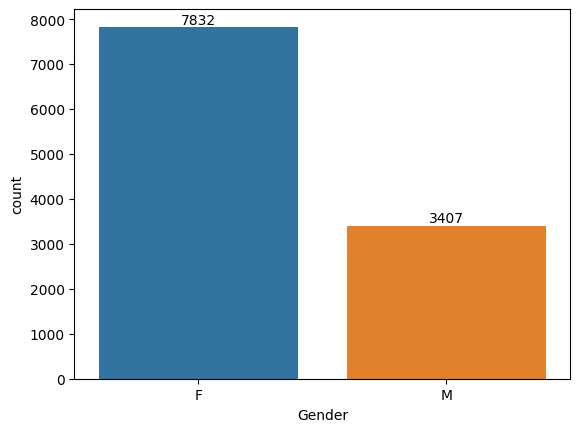

In [19]:
# Check the male and Female count
number_of_gender = sns.countplot(x='Gender',hue = 'Gender',data = data)
## for validating the exact number
for bars in number_of_gender.containers :
  number_of_gender.bar_label(bars)


In [20]:
sales_gen = data.groupby(['Gender'],as_index=False)['Amount'].sum()
sales_gen


,Gender,Amount
0,F,74335853
1,M,31913276


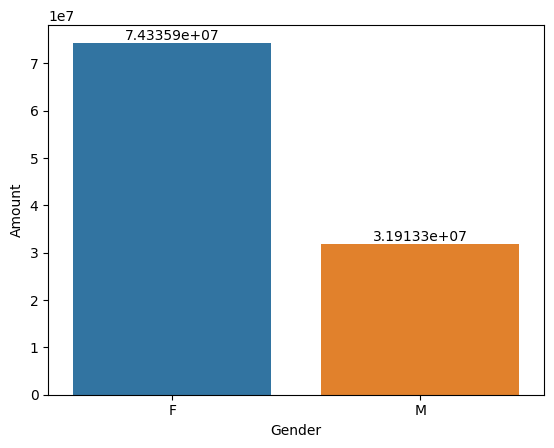

In [21]:
sales_gen_rep = sns.barplot(x = 'Gender', y='Amount', hue='Gender', data= sales_gen)
for bars in sales_gen_rep.containers :
  sales_gen_rep.bar_label(bars)

For the above analysis we obsever that most of the buyers are Females and even the purchasing power of Females are greater than men.



**Age**


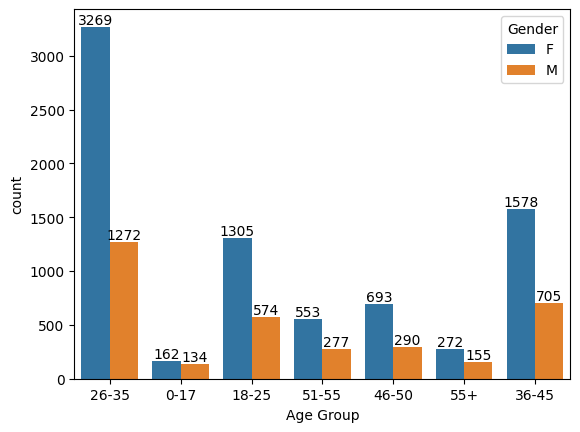

In [22]:
no_of_age = sns.countplot(x = 'Age Group',hue = 'Gender', data=data)

for bars in no_of_age.containers :
  no_of_age.bar_label(bars)

From above analyis we obsever that most of the buyer age group between 25-30 Female.


# State

In [23]:
# Total number of Top 10 states
sales_state = data.groupby(['State'], as_index = False )['Orders'].sum().sort_values(by ='Orders', ascending = False).head(10)
sales_state

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


<Axes: xlabel='State', ylabel='Orders'>

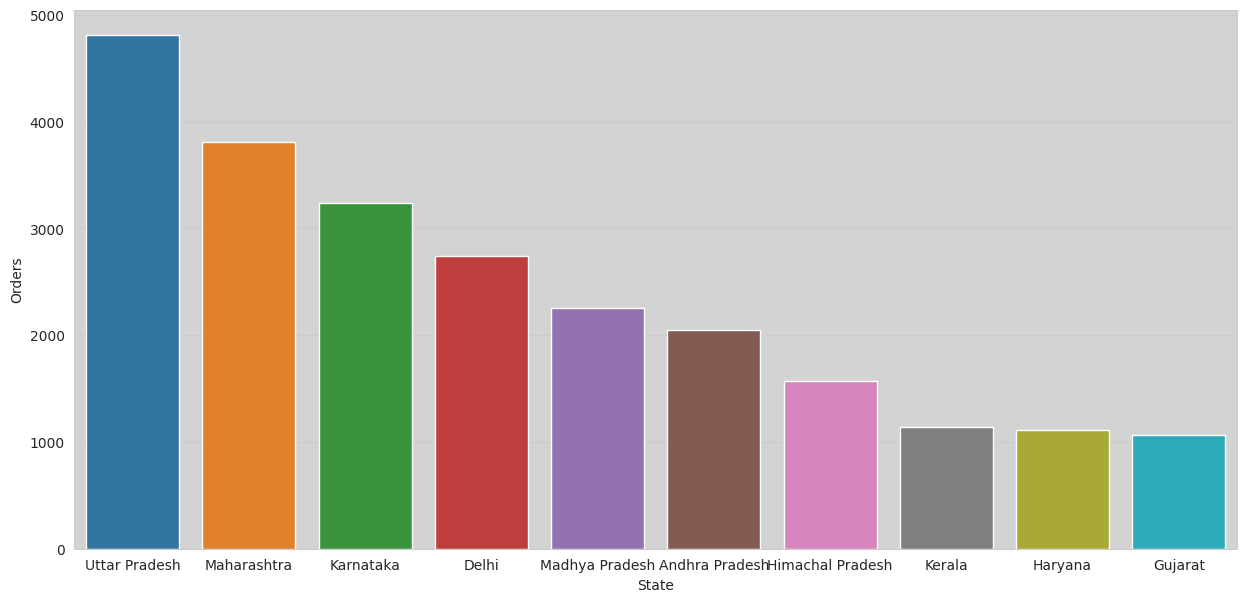

In [24]:
plt.figure(figsize=(15, 7))
# Set the background color using set_style()
sns.set_style("whitegrid", {'axes.facecolor': 'lightgrey'})
sns.barplot(data = sales_state, x='State', y='Orders', hue = 'State')

In [25]:
# Total amount/Sales from top 10 States.
sales_amount = data.groupby(['State'], as_index = False )['Amount'].sum().sort_values(by ='Amount', ascending = False).head(10)
sales_amount


,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


<Axes: xlabel='State', ylabel='Amount'>

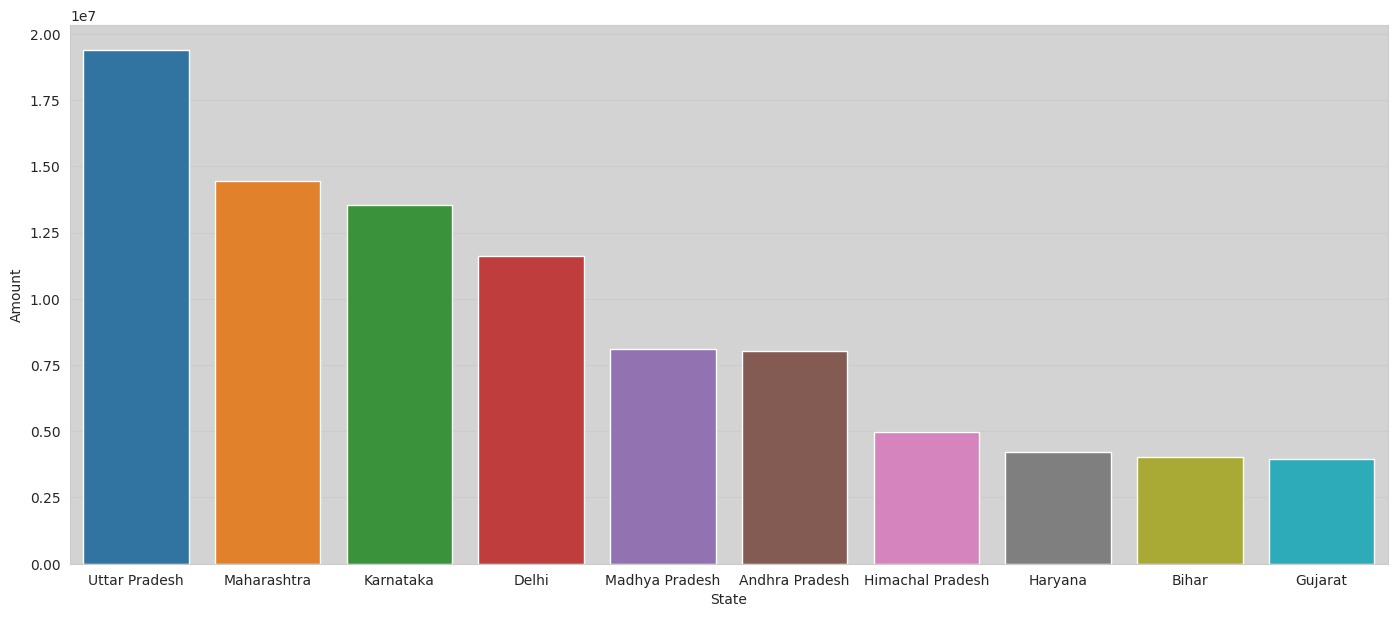

In [26]:
plt.figure(figsize=(17, 7))
# Set the background color using set_style()
sns.set_style("whitegrid", {'axes.facecolor': 'lightgrey'})
sns.barplot(data = sales_amount, x='State', y='Amount', hue = 'State')

# Martial Status

In [27]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

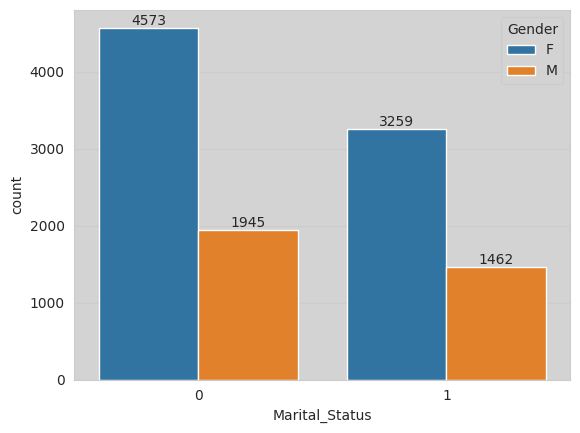

In [28]:
# Check the male and Female count
marital_status = sns.countplot(x='Marital_Status', hue = 'Gender', data = data)
## for validating the exact number
for bars in marital_status.containers :
  marital_status.bar_label(bars)

In [29]:
marital_status_amount = data.groupby(['Marital_Status','Gender'], as_index = False )['Amount'].sum().sort_values(by ='Amount', ascending = False)
marital_status_amount


,Marital_Status,Gender,Amount
0,0,F,43786646
2,1,F,30549207
1,0,M,18338738
3,1,M,13574538


<Axes: xlabel='Marital_Status', ylabel='Amount'>

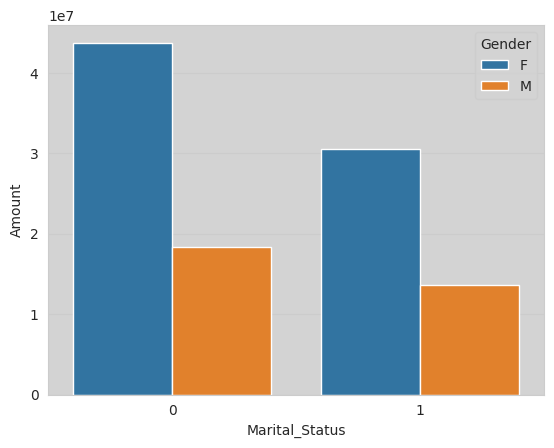

In [30]:
sns.barplot(data = marital_status_amount, x='Marital_Status', y='Amount', hue = 'Gender')

From the above observation we can say that most of the buyers are married womans.

# Occupation

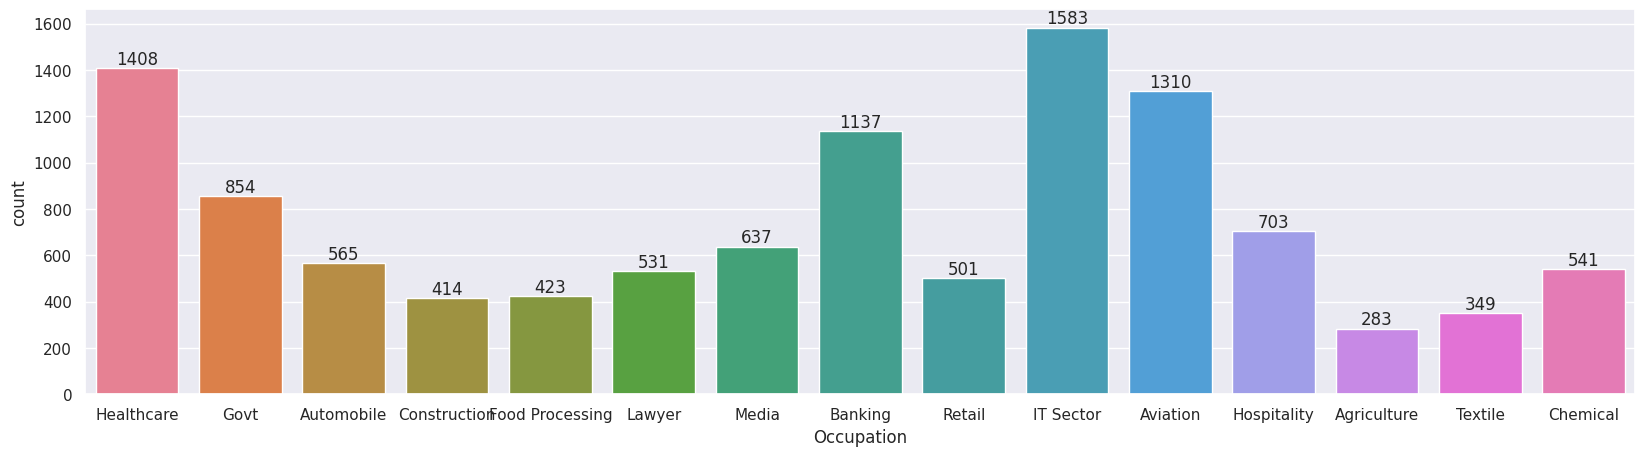

In [57]:
sns.set(rc ={'figure.figsize' :(20,5)})
occupation_status = sns.countplot(x='Occupation',hue='Occupation', data = data)
## for validating the exact number
for bars in occupation_status.containers :
  occupation_status.bar_label(bars)

In [49]:
occupation_status_amount = data.groupby(['Occupation'], as_index = False )['Amount'].sum().sort_values(by ='Amount', ascending = False)
occupation_status_amount


,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


<Axes: xlabel='Occupation', ylabel='Amount'>

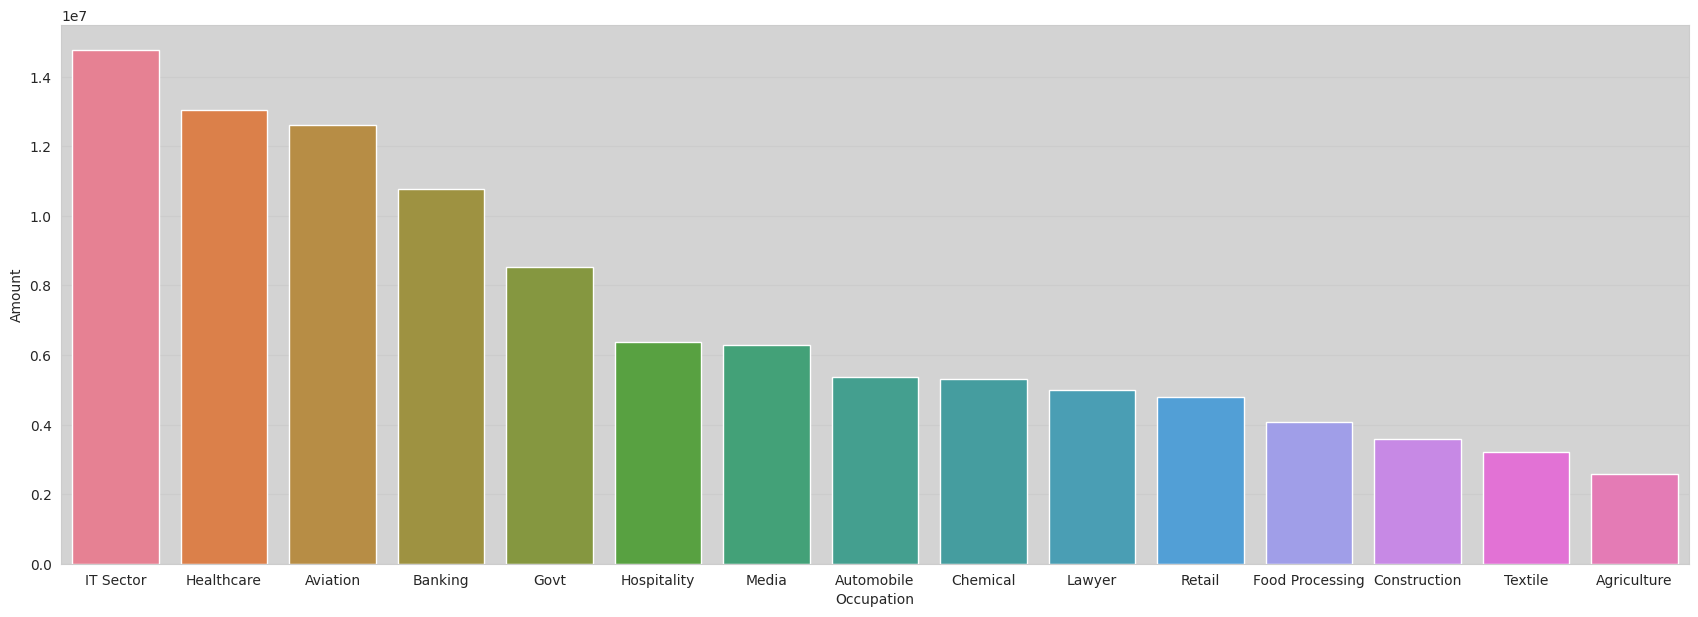

In [50]:
plt.figure(figsize=(21, 7))
sns.barplot(data = occupation_status_amount, x='Occupation', y='Amount', hue='Occupation')

From above obsrvations we can say that most of the buyers are working in IT sector,Healthcare and Aviation sector.


In [53]:
occupation_status_gender = data.groupby(['Occupation','Gender'], as_index = False )['Amount'].sum().sort_values(by ='Amount', ascending = False)
occupation_status_gender

,Occupation,Gender,Amount
20,IT Sector,F,10184835
4,Aviation,F,9007393
16,Healthcare,F,8968231
6,Banking,F,7792295
14,Govt,F,6002907
21,IT Sector,M,4570244
24,Media,F,4375029
18,Hospitality,F,4183199
17,Healthcare,M,4066355
2,Automobile,F,3768843


<Axes: xlabel='Occupation', ylabel='Amount'>

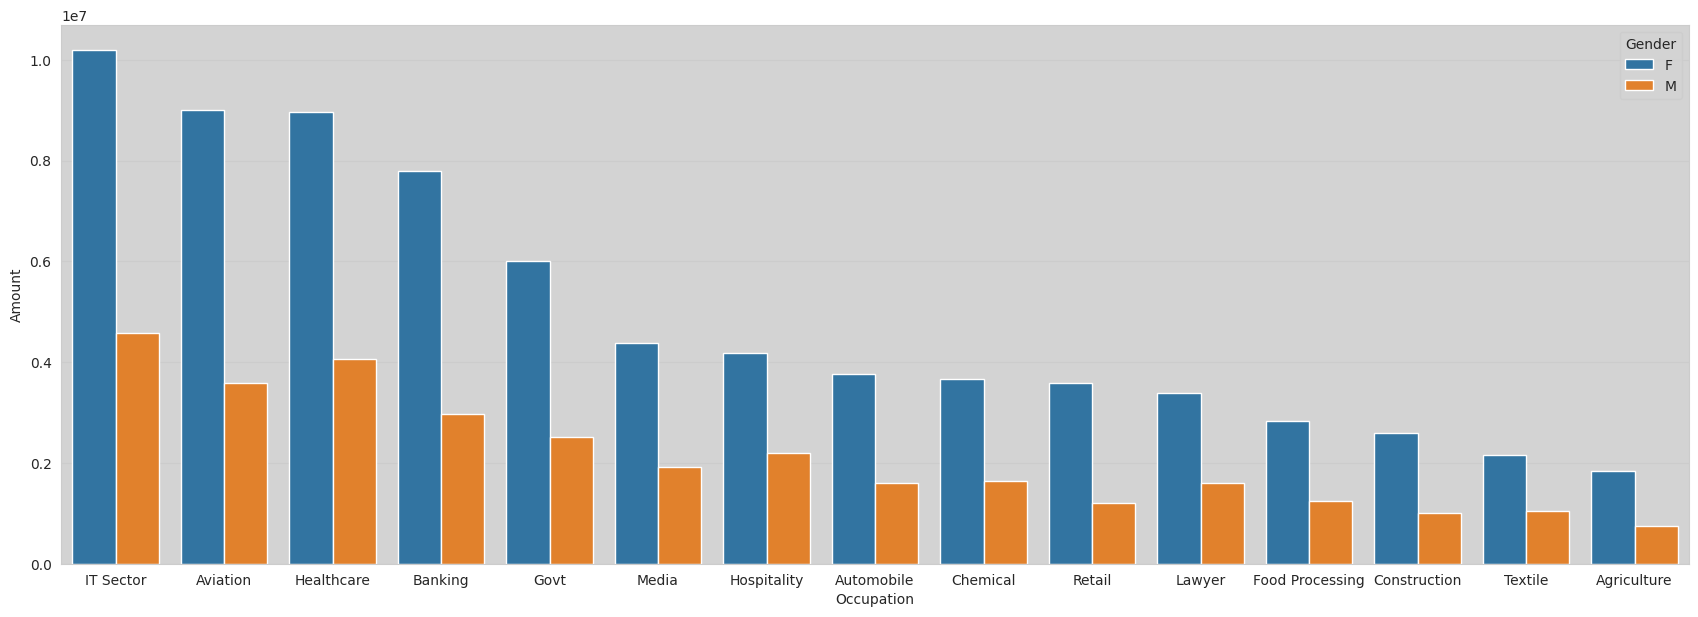

In [55]:
plt.figure(figsize=(21, 7))
sns.barplot(data = occupation_status_gender, x='Occupation', y='Amount', hue='Gender')

# Product Category


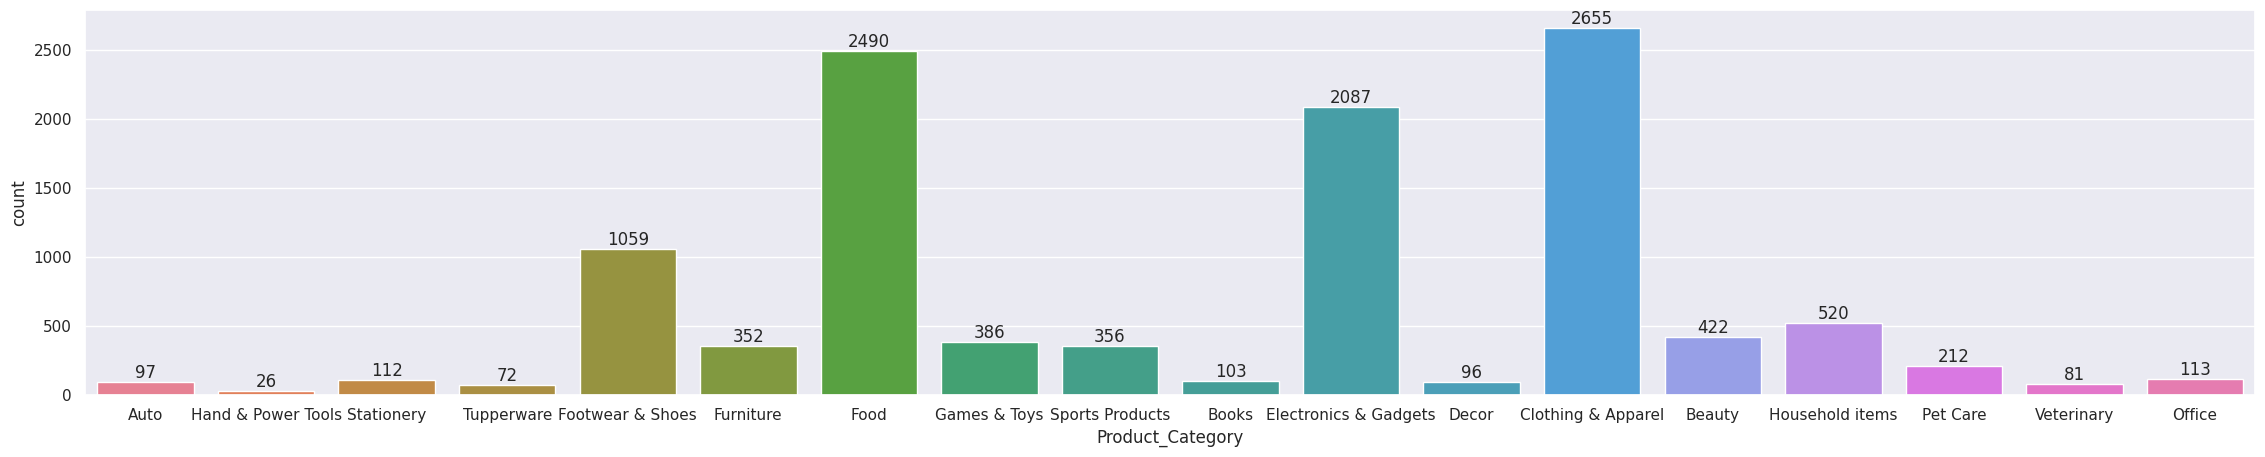

In [62]:
sns.set(rc ={'figure.figsize' :(28,5)})
product_status = sns.countplot(x='Product_Category',hue='Product_Category', data = data)
## for validating the exact number
for bars in product_status.containers :
  product_status.bar_label(bars)

In [59]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [70]:
product_status_amount = data.groupby(['Product_Category'], as_index = False )['Amount'].sum().sort_values(by ='Amount', ascending = False).head(10)
product_status_amount


,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1958609
15,Stationery,1676051


<Axes: xlabel='Product_Category', ylabel='Amount'>

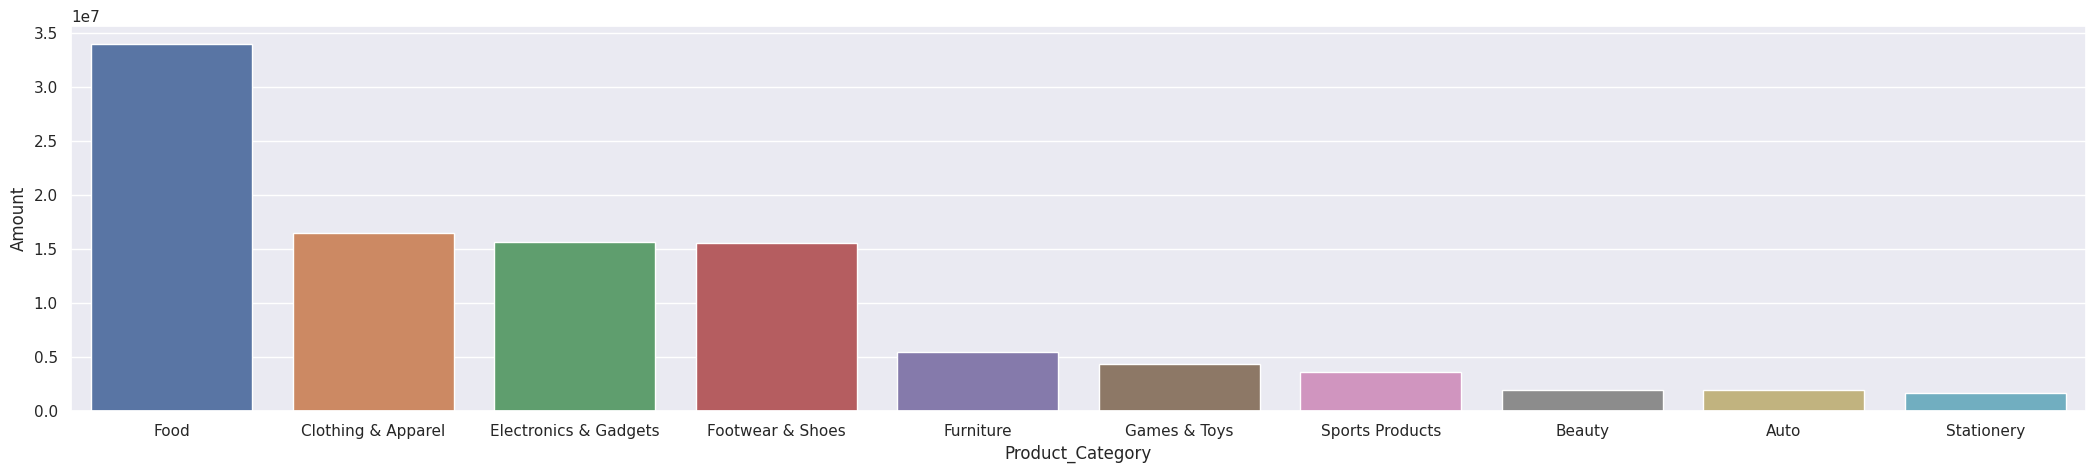

In [72]:
sns.set(rc ={'figure.figsize' :(26,5)})
sns.barplot(data = product_status_amount, x='Product_Category', y='Amount', hue='Product_Category')

From above graphs we can see that most the sold products are from food, clothings
 and Electronics category.

In [73]:
product_status_orders = data.groupby(['Product_ID'], as_index = False )['Orders'].sum().sort_values(by ='Orders', ascending = False).head(10)
product_status_orders

,Product_ID,Orders
1679,P00265242,127
644,P00110942,116
1504,P00237542,91
1146,P00184942,82
679,P00114942,79
171,P00025442,79
708,P00117942,76
888,P00145042,76
298,P00044442,75
643,P00110842,74


<Axes: xlabel='Product_ID', ylabel='Orders'>

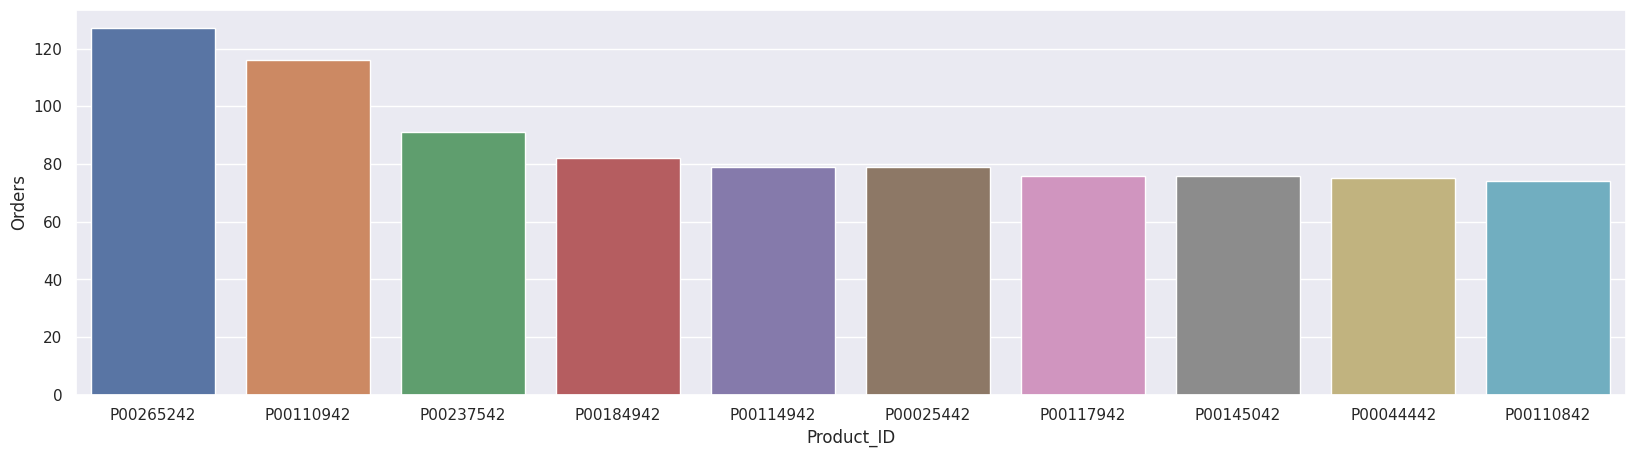

In [75]:
sns.set(rc ={'figure.figsize' :(20,5)})
sns.barplot(data = product_status_orders, x='Product_ID', y='Orders', hue='Product_ID')

# Conclusion


 Married woman age group 26-35 yrs from UP, Maharastha & karnataka working in IT, Healthcare and aviation are more likely to buy products from food clothing and Electronics category.